# Build Model

> **Nhận xét**
> * Về tập dữ liệu `ecoli`, số lượng feature và sample ko nhiều.
> * Dependent variable là categorical variable và có hai class.
> * Xem xét các feature, hầu như chúng độc lập lẫn nhau, ko có hiện tượng đa cộng tuyến.

> $\Rightarrow$ Phù hợp với logistic regression

In [1]:
%load_ext autoreload
%autoreload 2

from modules.file import CPandasFile
from modules.logistic_regression import CLogisticRegression
import pandas as pd

1. Đọc dữ liệu

In [2]:
ecoli_raw = CPandasFile().readCsv(r'./data/ecoli.csv')

ecoli_raw

,mcg,gvh,lip,chg,aac,alm1,alm2,binaryClass
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,P
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,P
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,P
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,P
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,P
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,N
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,N
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,N
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,N


2. Chuẩn bị tập input `X` và output `y`

In [3]:
X = ecoli_raw.drop(columns=['binaryClass'])
y = ecoli_raw['binaryClass']

X, y

(      mcg   gvh   lip  chg   aac  alm1  alm2
 0    0.49  0.29  0.48  0.5  0.56  0.24  0.35
 1    0.07  0.40  0.48  0.5  0.54  0.35  0.44
 2    0.56  0.40  0.48  0.5  0.49  0.37  0.46
 3    0.59  0.49  0.48  0.5  0.52  0.45  0.36
 4    0.23  0.32  0.48  0.5  0.55  0.25  0.35
 ..    ...   ...   ...  ...   ...   ...   ...
 331  0.74  0.56  0.48  0.5  0.47  0.68  0.30
 332  0.71  0.57  0.48  0.5  0.48  0.35  0.32
 333  0.61  0.60  0.48  0.5  0.44  0.39  0.38
 334  0.59  0.61  0.48  0.5  0.42  0.42  0.37
 335  0.74  0.74  0.48  0.5  0.31  0.53  0.52
 
 [336 rows x 7 columns],
 0      P
 1      P
 2      P
 3      P
 4      P
       ..
 331    N
 332    N
 333    N
 334    N
 335    N
 Name: binaryClass, Length: 336, dtype: object)

3. Tách dữ liệu bằng `train_test_split`

In [4]:
test_sizes = (.3, .25, .2)
logistic_regression = CLogisticRegression(X, y)
evaluation_table = []

for test_size in test_sizes:
    accuracy_scores = []

    for _ in range(10):
        logistic_regression.prepareData(test_size=test_size)
        logistic_regression.initModel()
        accuracy_scores.append(logistic_regression.accuracy())

    tmp = {
        'Ratio training:test': '{}:{}'.format(1 - test_size, test_size),
        'Accuracy score': sum(accuracy_scores)/10.
    }

    evaluation_table.append(tmp)

pd.DataFrame(evaluation_table)

,Ratio training:test,Accuracy score
0,0.7:0.3,0.944554
1,0.75:0.25,0.963095
2,0.8:0.2,0.939706


> **Nhận xét**
> * Với từng tỉ lệ training:test data, ta sẽ build 10 model ứng với mỗi tỉ lệ, sau đó tính trung bình accuracy ra thì nhìn chung ta thấy với tỉ lệ 0.75:0.25 thì model hoạt động khá ổn, mang tính ổn định cao, giải quyết dc 95% trên toàn bộ dữ liệu.

4. Build lại model với tỉ lệ training:test là 0.75:0.25

In [5]:
logistic_regression.prepareData(test_size=0.25)
logistic_regression.initModel()

5. Đánh giá bằng confusion matrix

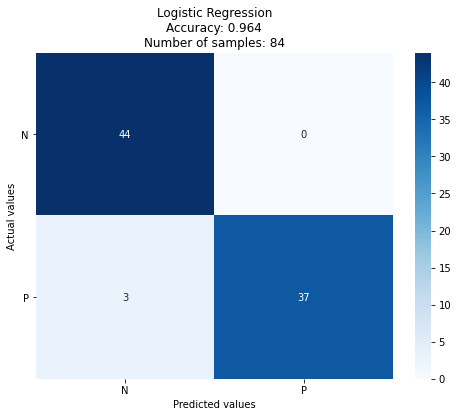

,binaryClass
N,44
P,40


In [6]:
logistic_regression.confusionMatrix()

> **Nhận xét**
> * Nhìn chung, dựa trên confusion matrix thì model tỉ lệ dự đoán sai thấp.

6. Đánh giá bằng Precision - Recall

In [7]:
logistic_regression.precisionRecall()

              precision    recall  f1-score   support

           N       0.94      1.00      0.97        44
           P       1.00      0.93      0.96        40

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



> **Nhận xét**
> * Các điểm số của precision, recall, f1-score khá cao, trên 90%.

7. Đánh giá dữ liệu bằng `k-fold`

In [8]:
logistic_regression.kfold(6)

Accuracy - mean: 86.607%, std: 9.547%


> **Nhận xét**
> * Model dự đoán ổn, độ chính xác dc khoảng hơn 85% với phương sai khoảng 10%.

8. Kết luận:
* Model dự đoán ổn với model sử dụng Logistic Regression, độ chính xác cao.